# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results,mouse_metadata, on = 'Mouse ID',how = 'left')


# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [201]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#array(['g989'], dtype=object)

dupe = df[df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']



dupe




137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
df[df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = df[df['Mouse ID'] != 'g989']

df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
df2['Mouse ID'].nunique()

248

## Summary Statistics

In [192]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


summarytest = df2[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg({
'Tumor Volume (mm3)': 'mean',
'Tumor Volume (mm3)': 'median',
'Tumor Volume (mm3)': 'var',
'Tumor Volume (mm3)': 'std',
'Tumor Volume (mm3)': 'sem',
})


summary.columns = [
'Mean Tumor Volume',
'Median Tumor Volume',
'Tumor Volume Variance',
'Tumor Volume Std. Dev.',
'Tumor Volume Std. Err.'
]

summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [193]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = df2[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(
['mean','median','var','std','sem']
)
agg_summary



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

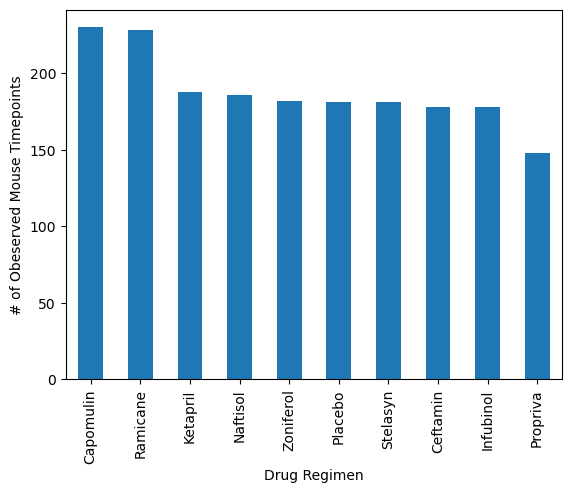

In [194]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = df2[['Drug Regimen','Timepoint']].groupby('Drug Regimen').count().sort_values('Timepoint',ascending = False).plot.bar(legend = False)
plt.ylabel('# of Obeserved Mouse Timepoints')
plt.show()

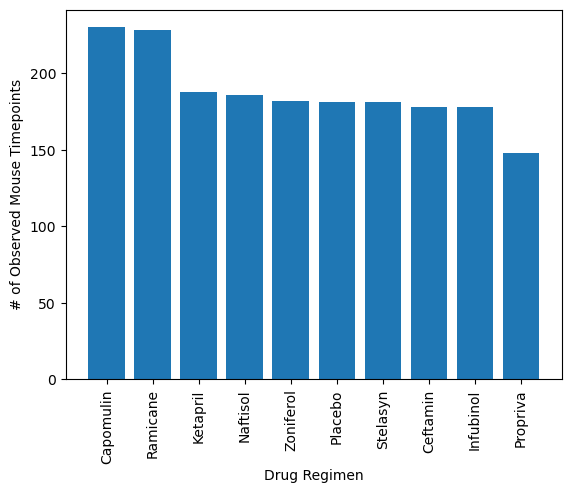

In [195]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_data = df2[['Drug Regimen','Timepoint']].groupby('Drug Regimen').count().sort_values('Timepoint',ascending = False)
x_axis = pyplot_data.index.tolist()
y_axis = pyplot_data['Timepoint'].tolist()
pyplot_bar = plt.bar(x_axis,y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)

# pyplot_data
plt.show()

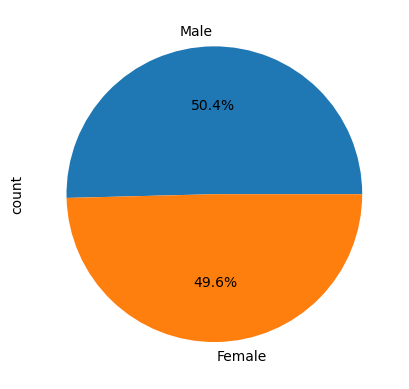

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
pandas_pie_data = df2[['Mouse ID','Sex']].drop_duplicates().groupby('Sex').size().sort_values(ascending = False)
pandas_pie = pandas_pie_data.plot.pie(autopct='%1.1f%%')


                                      
plt.ylabel('count')
# Get the unique mice with their gender
# pandas_pie_chart = pandas_pie.pie(
# pandas_pie
# Make the pie chart
plt.show()


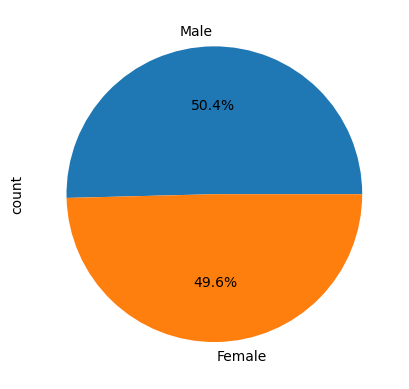

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.pie(pandas_pie_data,labels = ['Male','Female'],autopct='%1.1f%%')
plt.ylabel('count')

plt.show()
# Make the pie chart


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
Final_Vol = df2[['Mouse ID','Timepoint']].groupby('Mouse ID').max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge = pd.merge(Final_Vol,df2[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']], on = ['Mouse ID','Timepoint'], how = 'left')
# merge = merge.iloc[:,[0,4,2,1]].rename(columns= {'Timepoint_y': 'Timepoint','Timepoint_ })
# merge.columns
merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#here they are in a list, I will put them in a dict for easier plotting and access during loop. 

# Create empty list to fill with tumor vol data (for plotting)
vol_data = {
'Capomulin':[],
'Ramicane':[],
'Infubinol':[],
'Ceftamin':[]
}

for t in treatments:
    #obtain series from just the drug we are currently looking at and sort the list
    current_list = merge[merge['Drug Regimen'] == t]['Tumor Volume (mm3)'].sort_values()
    for x in current_list:
        vol_data[t].append(x) #adding data to lists for plotting. 


    #using the quantile method to get upper and lower quartiles, subtracting to get the iqr,
    #using the iqr to get upper and lower bounds
    quartiles = current_list.quantile([.25,.5,.75])
    upper = quartiles[.75]
    lower = quartiles[.25]
    iqr = upper - lower
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    
    mask = (current_list < lower_bound) | (current_list > upper_bound)
    #^this is a long conditional that we will enter into current_list to get only get outliers
    outliers = current_list[mask]
    #I learned that the input for a conditional in a dataframe [] is called a boolean mask. 
    #outputting everything in a formatted string:
    print(f"{t}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


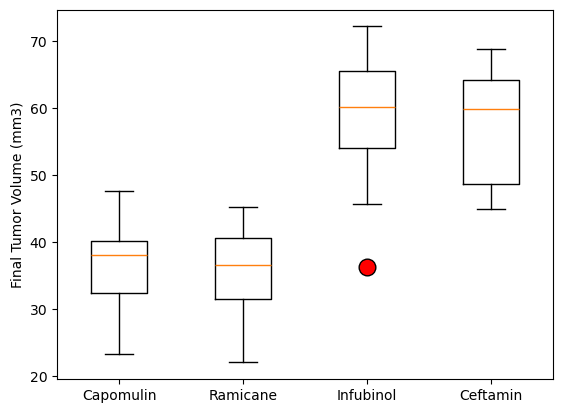

In [68]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)
#In order to get the outlier to look the same as the example, I used the flierprops dictionary 
#to emphasize the outlier and color it red. 
plt.boxplot([vol_data[t] for t in treatments], labels = treatments, flierprops = flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatement of mouse l509')

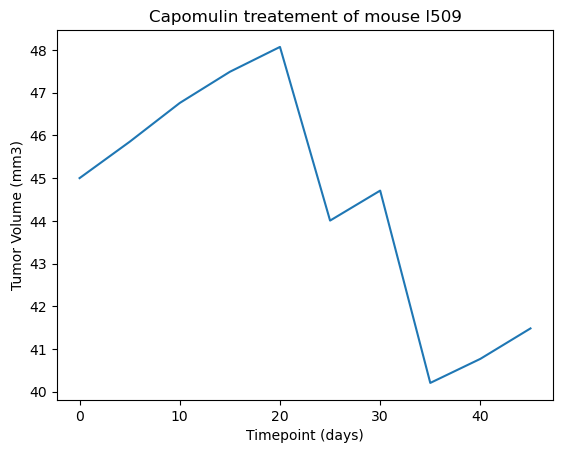

In [197]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = df2[df2['Mouse ID'] == 'l509']

plt.plot(l509['Timepoint'],l509['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treatement of mouse l509')


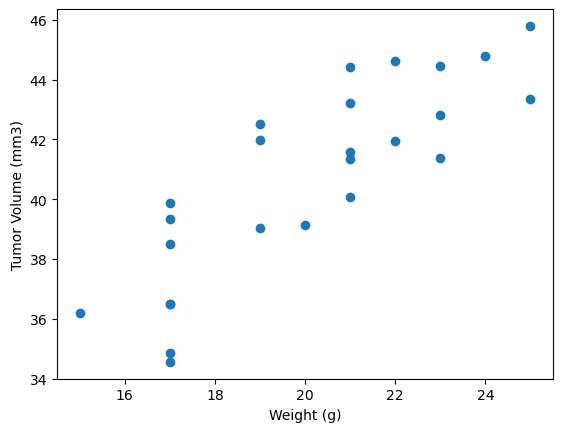

In [171]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_weight = df2[df2['Drug Regimen'] == 'Capomulin'][['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
avg_weight = avg_weight.groupby('Mouse ID').agg({
'Weight (g)': 'first',
'Tumor Volume (mm3)': 'mean'
})


# .groupby('Mouse ID').mean()
x = avg_weight['Weight (g)']
y = avg_weight['Tumor Volume (mm3)']
# avg_weight = avg_weight[['Weight (g)','Tumor Volume (mm3)']].groupby(avg_weight['Weight (g)']).mean() 
                                    
plt.scatter(x,y)  
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
                                        

## Correlation and Regression

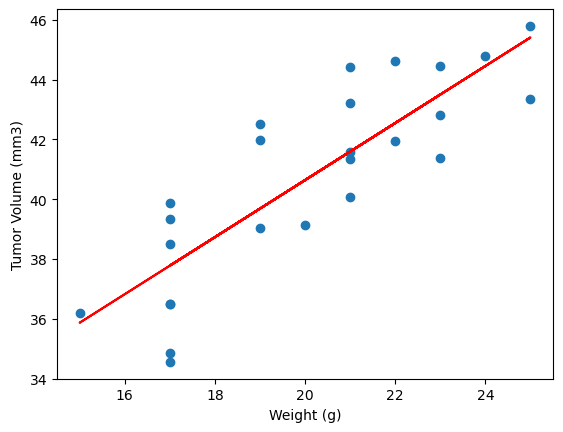

In [177]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#unpacking variables from the data returned from the stats.lingregress method
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_weight['Weight (g)'],avg_weight['Tumor Volume (mm3)']) 
regress_values = x * slope + intercept
#multiplying every x value by the slope and adding the intercept to get plottable y values

#plot and add labels
plt.scatter(x,y)  
plt.plot(x,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()